## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Descubrimiento de grupos en los datos

---

En esta libreta se generan los modelos de clusterización sobre el dataset final del escenario para su posterior evaluación y análisis. Se utilizará como herramienta de soporte a mlflow para el registro completo de la experimentación. 

---

In [2]:
# Importación de librerías

import pandas as pd
# Se importa mlflow para registro de la experimentación 
import mlflow
# Se importan los métodos a utilizar para clusterizar
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, MeanShift
# Se importan las métricas a utilizar para evaluar el proceso
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


----

##### Lectura del dataset

In [3]:
df = pd.read_csv("../../../data/final/datos_clusterizacion.csv", sep=";")
df.head(5)

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,21,1000,2,5.0,9600,0.10,11.14,0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
1,23,35000,2,4.0,65500,0.53,15.23,1,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
2,24,35000,4,8.0,54400,0.55,14.27,1,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False
3,21,2500,2,2.0,9900,0.25,7.14,1,34.0,1171.0,...,True,False,True,False,False,False,False,True,False,False
4,26,35000,3,8.0,77100,0.45,12.42,1,21.0,816.0,...,True,False,False,True,False,False,False,False,False,True


----

##### Configuración de la experimentación


In [4]:
# Se genera el experimento en mlflow
exp_name = 'Experimentación clustering'
exp_id = mlflow.create_experiment(name=exp_name)


##### Prueba Nro. 1

* KMeans

In [5]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans - K=2"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=2)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 2)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "Kmeans_K2")

    # Se finaliza el registro
    mlflow.end_run()

Para contabilizar los elementos por cluster se utilizan las labels generadas

In [6]:
# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k2 = df.copy()
# Se agregan las labels generadas
df_kmeans_k2['cluster'] = cluster_labels
df_kmeans_k2['cluster'].value_counts()

cluster
0    8276
1     602
Name: count, dtype: int64

In [7]:
df_kmeans_k2.to_csv("../../../data/experimentacion_clustering/resultados_kmeans_k2.csv", sep=";", index=False)

* Clustering Jerárquico 

Se pasa a probar otro método (clustering jerárquico)

In [8]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="AGClustering - K=3"):
    # Selección y configuración de la técnica
    modelo_clusters = AgglomerativeClustering(n_clusters=3)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 3)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "AGC_K3")

    # Se finaliza el registro
    mlflow.end_run()

2024/05/04 23:44:36 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Para contabilizar los elementos por cluster se utilizan las labels generadas

In [9]:
# Se preserva el conjunto de datos original para evitar problemas
df_agc_k3 = df.copy()
# Se agregan las labels generadas
df_agc_k3['cluster'] = cluster_labels
df_agc_k3['cluster'].value_counts()

cluster
0    4558
2    3950
1     370
Name: count, dtype: int64

In [10]:
df_agc_k3.to_csv("../../../data/experimentacion_clustering/resultados_agc_k3.csv", sep=";", index=False)

* MeanShift

Se prueba un método que no tiene parámetros

In [11]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="MeanShift"):
    # Selección y configuración de la técnica
    modelo_clusters = MeanShift()
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # No hay parámetros por registrar

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "MS")

    # Se finaliza el registro
    mlflow.end_run()

Para contabilizar los elementos por cluster se utilizan las labels generadas

In [12]:
# Se preserva el conjunto de datos original para evitar problemas
df_ms = df.copy()
# Se agregan las labels generadas
df_ms['cluster'] = cluster_labels
df_ms['cluster'].value_counts()

cluster
0    8512
1     290
2      49
3      11
4       8
5       7
6       1
Name: count, dtype: int64

In [13]:
df_ms.to_csv("../../../data/experimentacion_clustering/resultados_ms.csv", sep=";", index=False)

* DBSCAN

(0.0, 6000.0)

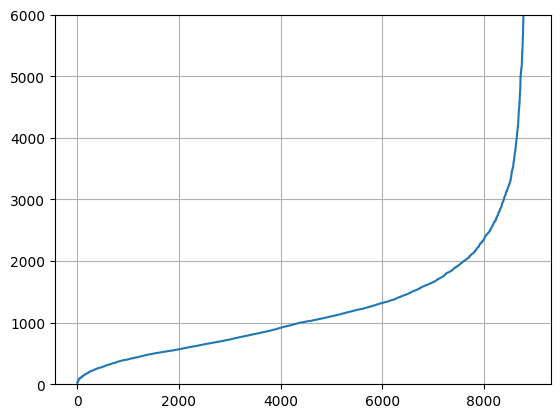

In [20]:
# El siguiente código implementa knn para determinar el valor de eps

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import numpy as np

# minPts = 2 * D, donde D = 39 num de atributos. En este caso, minPts = neighbors = 39*2 = 78
neighbors = 78

# Se calcula la distancia media entre cada par de puntos y sus 78 vecinos
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(df)
distances, indices = nbrs.kneighbors(df)

# Se ordena los valores de las distancias calculadas de manera ascendente
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Se grafica el resultado para encontrar el valor del codo
plt.plot(distances)
plt.grid(True)
plt.ylim((0,6000))

Para este primer experimento tomamos:
* minPts = 78
* eps = 3000, el punto de máxima curvatura que se observa en el gráfico superior

In [21]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="DBSCAN - eps=3000, minPts= 78"):
    # Selección y configuración de la técnica
    modelo_clusters = DBSCAN(eps=3000, min_samples=78)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registran los parametros eps and min_samples
    mlflow.log_param('Valor eps', 3000)
    mlflow.log_param('Valor min_samples', 78)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "DBSCAN - eps=3000, minPts= 78")

    # Se finaliza el registro
    mlflow.end_run()

2024/05/05 00:11:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Para contabilizar los elementos por cluster se utilizan las labels generadas

In [22]:
# Se preserva el conjunto de datos original para evitar problemas
df_dbscan_3000 = df.copy()
# Se agregan las labels generadas
df_dbscan_3000['cluster'] = cluster_labels
df_dbscan_3000['cluster'].value_counts()

cluster
-1    4903
 0    3975
Name: count, dtype: int64

El modelo devuelve más de la mitad de muestras en el cluster -1, es decir, se consideran muestras que no pertenecen a ningún cluster ("noisy samples")

In [23]:
df_dbscan_3000.to_csv("../../../data/experimentacion_clustering/resultados_df_dbscan_3000.csv", sep=";", index=False)

----

##### Prueba Nro. 2




* Kmeans

In [24]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans - K=3"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=3)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 3)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "Kmeans_K3")

    # Se finaliza el registro
    mlflow.end_run()

In [25]:
# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k3 = df.copy()
# Se agregan las labels generadas
df_kmeans_k3['cluster'] = cluster_labels
df_kmeans_k3['cluster'].value_counts()

cluster
1    4701
2    3872
0     305
Name: count, dtype: int64

In [26]:
df_kmeans_k3.to_csv("../../../data/experimentacion_clustering/resultados_kmeans_k3.csv", sep=";", index=False)

- Clustering Jerárquico

In [27]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="AGClustering - K=2"):
    # Selección y configuración de la técnica
    modelo_clusters = AgglomerativeClustering(n_clusters=2)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 2)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "AGC_K2")

    # Se finaliza el registro
    mlflow.end_run()

2024/05/05 00:29:02 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [28]:
# Se preserva el conjunto de datos original para evitar problemas
df_agc_k2 = df.copy()
# Se agregan las labels generadas
df_agc_k2['cluster'] = cluster_labels
df_agc_k2['cluster'].value_counts()

cluster
0    8508
1     370
Name: count, dtype: int64

In [29]:
df_agc_k2.to_csv("../../../data/experimentacion_clustering/resultados_agc_k2.csv", sep=";", index=False)

* DBSCAN

Debido a que el número de atributos del dataset ha sido incrementado por la discretización de los atributos nominales y teniendo en cuenta que DBSCAN consideró outliers una gran cantidad de muestras en la iteración anterior, para este experimento consideramos la cantidad de atributos originales (20) para calcular el parámetro MinPts

(0.0, 6000.0)

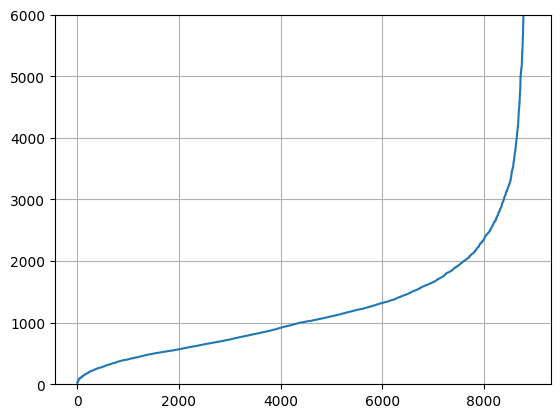

In [33]:
# El siguiente código implementa knn para determinar el valor de eps

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import numpy as np

# minPts = 2 * D, donde D = 20 num de atributos. En este caso, minPts = neighbors = 20*2 = 40
neighbors =20

# Se calcula la distancia media entre cada par de puntos y sus 78 vecinos
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(df)
distances, indices = nbrs.kneighbors(df)

# Se ordena los valores de las distancias calculadas de manera ascendente
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Se grafica el resultado para encontrar el valor del codo
plt.plot(distances)
plt.grid(True)
plt.ylim((0,6000))

Para este experimento tomamos:
* minPts = 40
* eps = 3000, el punto de máxima curvatura que se observa en el gráfico superior

In [34]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="DBSCAN - eps=3000, minPts= 40"):
    # Selección y configuración de la técnica
    modelo_clusters = DBSCAN(eps=3000, min_samples=40)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registran los parametros eps and min_samples
    mlflow.log_param('Valor eps', 3000)
    mlflow.log_param('Valor min_samples', 40)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "DBSCAN - eps=3000, minPts= 40")

    # Se finaliza el registro
    mlflow.end_run()

2024/05/05 00:40:59 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [36]:
# Se preserva el conjunto de datos original para evitar problemas
df_dbscan_3000_40 = df.copy()
# Se agregan las labels generadas
df_dbscan_3000_40['cluster'] = cluster_labels
df_dbscan_3000_40['cluster'].value_counts()

cluster
 0    4875
-1    4003
Name: count, dtype: int64

In [37]:
df_dbscan_3000_40.to_csv("../../../data/experimentacion_clustering/resultados_df_dbscan_3000_40.csv", sep=";", index=False)

----

##### Prueba Nro. 3

* KMeans

Habiendo probado k=2 y k=3 en los experimentos anteriores, veamos con el método del codo qué valor de k es un buen candidato para el siguiente experimento

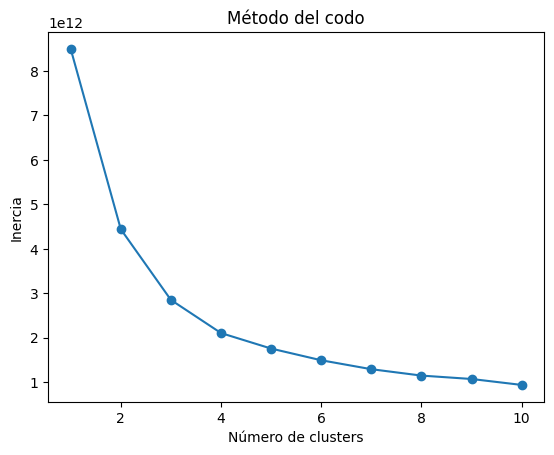

In [47]:
inercia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inercia.append(kmeans.inertia_)

plt.plot(range(1,11), inercia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

En vista de la gráfica anterior, seleccionamos k=4 para el modelo

In [48]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans - K=4"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=4)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 4)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "Kmeans_K4")

    # Se finaliza el registro
    mlflow.end_run()

In [49]:
# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k4 = df.copy()
# Se agregan las labels generadas
df_kmeans_k4['cluster'] = cluster_labels
df_kmeans_k4['cluster'].value_counts()

cluster
0    4188
3    3818
1     706
2     166
Name: count, dtype: int64

In [50]:
df_kmeans_k4.to_csv("../../../data/experimentacion_clustering/resultados_kmeans_k4.csv", sep=";", index=False)

* Clustering jerárquico


In [56]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="AGClustering - K=4"):
    # Selección y configuración de la técnica
    modelo_clusters = AgglomerativeClustering(n_clusters=4)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 4)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "AGC_K4")

    # Se finaliza el registro
    mlflow.end_run()

2024/05/05 01:07:28 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [57]:
# Se preserva el conjunto de datos original para evitar problemas
df_agc_k4 = df.copy()
# Se agregan las labels generadas
df_agc_k4['cluster'] = cluster_labels
df_agc_k4['cluster'].value_counts()

cluster
2    3950
3    3059
1    1499
0     370
Name: count, dtype: int64

In [58]:
df_agc_k4.to_csv("../../../data/experimentacion_clustering/resultados_agc_k4.csv", sep=";", index=False)

----

##### Experimento 2

Para registrar modelos en un nuevo experimento deberíamos proceder como muestra el siguiente código

In [52]:
# Se genera el experimento en mlflow
exp_name_2 = 'Experimentación clustering #2'
exp_id_2 = mlflow.create_experiment(name=exp_name_2)

In [53]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id_2, run_name="AGClustering - K=4"):
    # Selección y configuración de la técnica
    modelo_clusters = AgglomerativeClustering(n_clusters=4)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 4)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "AGC_K4")

    # Se finaliza el registro
    mlflow.end_run()

2024/05/05 01:03:19 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [54]:
# Se preserva el conjunto de datos original para evitar problemas
df_agc_k4 = df.copy()
# Se agregan las labels generadas
df_agc_k4['cluster'] = cluster_labels
df_agc_k4['cluster'].value_counts()

cluster
2    3950
3    3059
1    1499
0     370
Name: count, dtype: int64

In [55]:
df_agc_k4.to_csv("../../../data/experimentacion_clustering/resultados_agc_k4.csv", sep=";", index=False)